# Evil Geniuses Data Analyst Intern Assessment - Pranav Vishwanath

### Importing the Data

In [1]:
#importing the data into a pandas DataFrame
import pandas as pd
df = pd.read_excel("C:/Users/prana/Downloads/social_data.xlsx")
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0.0,0.0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0.0,0.0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0.0,0.0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116.0,42.0,Text


### Checking the Datatypes of the Dataframe

In [2]:
df.dtypes 

Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions           float64
Total Engagements           float64
Media Type                   object
dtype: object

### Splitting the Date object to classify it further into weekday/weekend and morning, eveining, afternoon

In [3]:
# Convert the datetime column to datetime dtype
df['Published Date'] = pd.to_datetime(df['Published Date'], format='%m-%d-%Y %H:%M')

# Extract the time portion and hour from the datetime column
df['time'] = df['Published Date'].dt.time
df['hour'] = df['Published Date'].dt.hour

# Classify as morning, afternoon, or evening
df['classification'] = pd.cut(df['hour'], bins=[0, 12, 18, 24], labels=['Morning', 'Afternoon', 'Evening'], right=False)

# Determine if it's a weekday or weekend
df['day_type'] = df['Published Date'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Print the DataFrame
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,time,hour,classification,day_type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text,19:55:43.192000,19,Evening,Weekday
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:35.243000,19,Evening,Weekday
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:33.535000,19,Evening,Weekday
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:31.583000,19,Evening,Weekday
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,19:43:42.590000,19,Evening,Weekday
...,...,...,...,...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0.0,0.0,Link,10:35:12.652000,10,Morning,Weekday
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0.0,0.0,Link,10:34:55.487000,10,Morning,Weekday
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0.0,0.0,Link,10:34:38.631000,10,Morning,Weekday
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116.0,42.0,Text,10:34:03.438000,10,Morning,Weekday


### Handling anomolies and cleaning the data

In [4]:
df['Account'].unique()

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [5]:
df['Account'] = df['Account'].str.strip()

In [6]:
df.set_index('Published Date', inplace=True)    

### Defining engagement rate = (total engagements / total impressions) * 100

In [7]:
df['engagement_rate'] = df['Total Engagements'] / df['Total Impressions'] * 100
df.loc[df['Total Impressions'] == 0, 'engagement_rate'] = 0

In [8]:
df

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,time,hour,classification,day_type,engagement_rate
Published Date,,,,,,,,,,,
2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text,19:55:43.192000,19,Evening,Weekday,0.000000
2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:35.243000,19,Evening,Weekday,0.000000
2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:33.535000,19,Evening,Weekday,0.000000
2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:31.583000,19,Evening,Weekday,0.000000
2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,19:43:42.590000,19,Evening,Weekday,12.766628
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0.0,0.0,Link,10:35:12.652000,10,Morning,Weekday,0.000000
2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0.0,0.0,Link,10:34:55.487000,10,Morning,Weekday,0.000000
2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0.0,0.0,Link,10:34:38.631000,10,Morning,Weekday,0.000000


In [9]:
df.groupby('Campaign Name')['engagement_rate'].min()

Campaign Name
Community Engagement     0.0
Evergreen                0.0
Evil Exhibited           0.0
N/A                      0.0
Name: engagement_rate, dtype: float64

### Filtering out the outlier rows which can skew analysis and visualizations

In [10]:
threshold = 100 

# Filter the DataFrame to extract rows with outliers based on the threshold

outlier_rows = df[df['engagement_rate'] >= threshold]


In [11]:
outlier_rows

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,time,hour,classification,day_type,engagement_rate
Published Date,,,,,,,,,,,
2023-03-10 12:37:06,General,FBPAGE,N/A,1.0,940.0,Photo,12:37:06,12,Afternoon,Weekday,94000.000000
2023-02-23 06:18:27,General,FBPAGE,N/A,1.0,1.0,Photo,06:18:27,6,Morning,Weekday,100.000000
2023-01-19 06:02:34,General,FBPAGE,N/A,5.0,44.0,Photo,06:02:34,6,Morning,Weekday,880.000000
2023-01-05 11:55:44,General,FBPAGE,N/A,300.0,3776.0,Photo,11:55:44,11,Morning,Weekday,1258.666667


### Just in case our engagement rate is >100%, The outliers will skew the metrics calculated below, as illustrated

### Plotting our data

In [12]:
ndf = df[df['engagement_rate'] <= 100] 

In [13]:
grouped_df = ndf.groupby('day_type')['engagement_rate'].mean()

In [14]:
grouped = df.groupby('day_type')['engagement_rate'].mean()

In [15]:
grouped_df

day_type
Weekday    4.319956
Weekend    3.733606
Name: engagement_rate, dtype: float64

## Q2 -  Does day of the week and time of posting affect engagement rates?

### Plotting engagement rates with days of the week

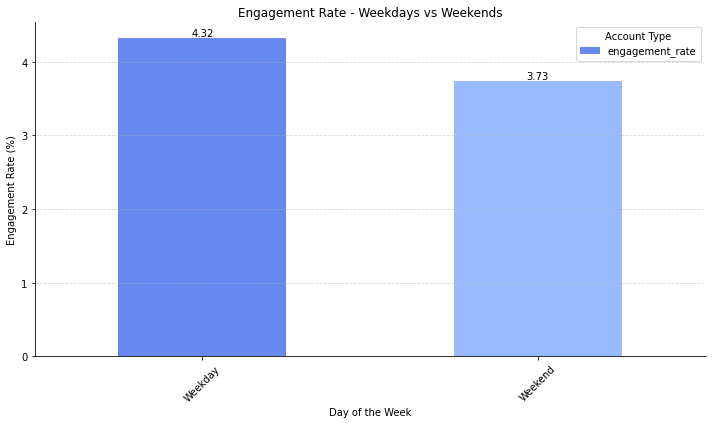

In [55]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = grouped_df.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rate - Weekdays vs Weekends')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


#### Over Five Days of the weekend, the engagement rate on average is 4.32% versus 3.73% in two days over the weekends

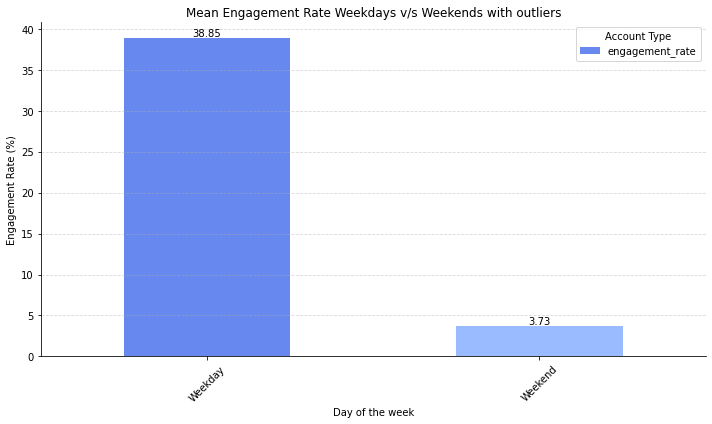

In [56]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Day of the week')
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Mean Engagement Rate Weekdays v/s Weekends with outliers')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1152x504 with 0 Axes>

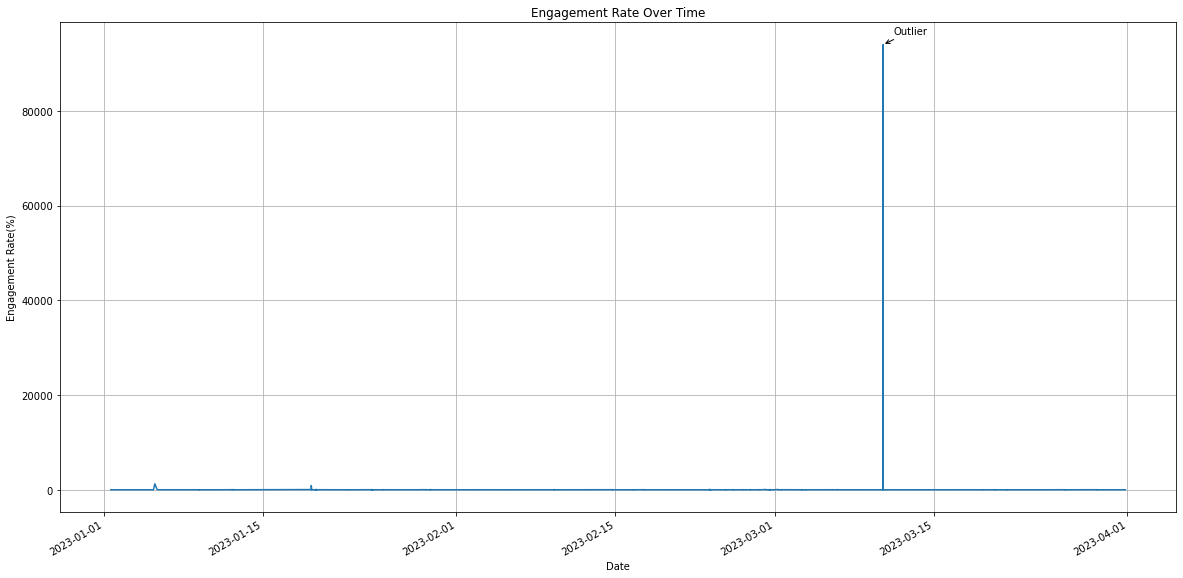

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
fig, ax = plt.subplots(figsize=(20, 10))
df['engagement_rate'].plot(ax=ax)

# Find the outlier point
outlier = df['engagement_rate'].idxmax() 

# Highlight the outlier point
ax.annotate('Outlier', xy=(outlier, df['engagement_rate'].loc[outlier]),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            textcoords='offset points', xytext=(10, 10))  # Adjust the xytext coordinates to move the label

# Set the labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Engagement Rate(%)')
ax.set_title('Engagement Rate Over Time')
ax.grid(True)

# Show the plot
plt.show()


## Time series plot with moving average of engagement rates over time

<Figure size 1152x504 with 0 Axes>

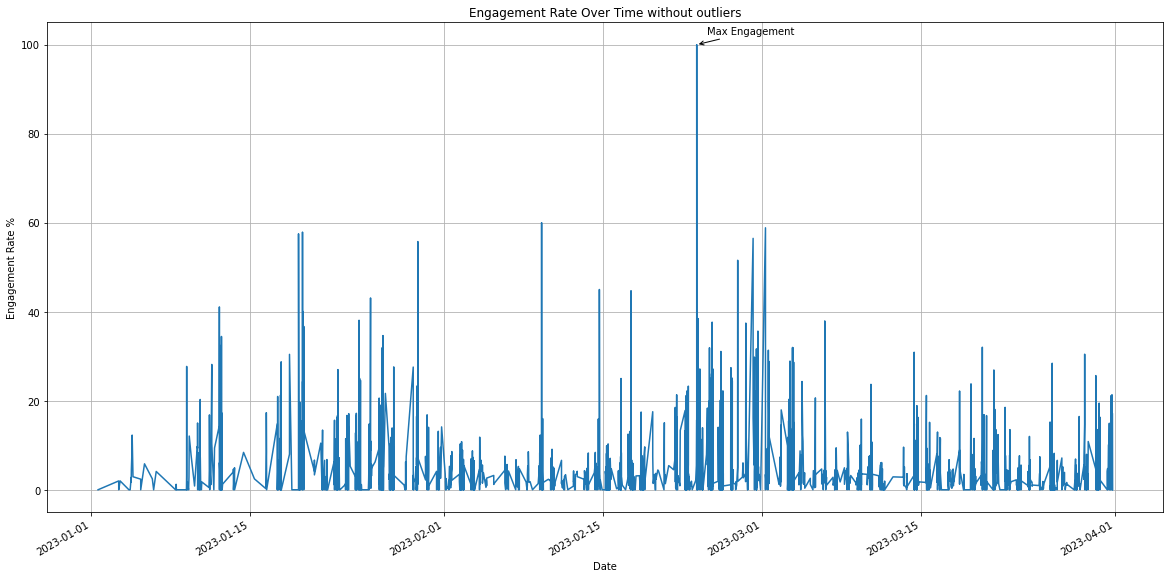

In [58]:
plt.figure(figsize = (16,7))
fig, ax = plt.subplots(figsize=(20,10))
ndf['engagement_rate'].plot(ax=ax)
# Set the labels and title

# Find the max engagement point
outlier = ndf['engagement_rate'].idxmax()  

# Highlight the max engagement point
ax.annotate('Max Engagement', xy=(outlier, ndf['engagement_rate'].loc[outlier]),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            textcoords='offset points', xytext=(10, 10))  # Adjust the xytext coordinates to move the label


ax.set_xlabel('Date')
ax.set_ylabel('Engagement Rate %')
ax.set_title('Engagement Rate Over Time without outliers')
ax.grid(True)
# Show the plot
plt.show()

<Figure size 1152x504 with 0 Axes>

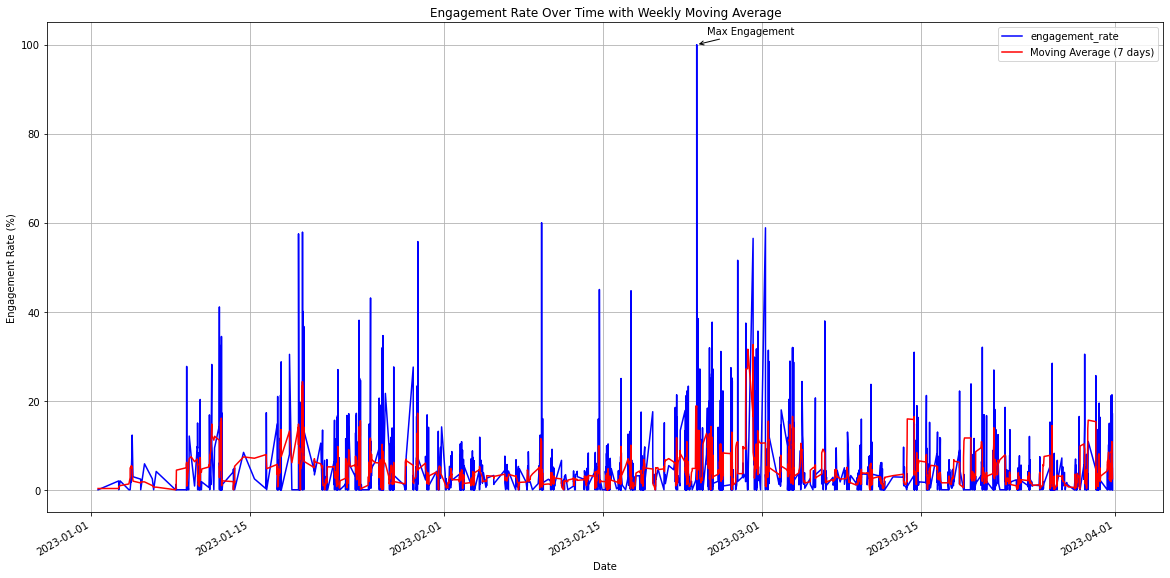

In [60]:
plt.figure(figsize=(16, 7))
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the engagement rate
ndf['engagement_rate'].plot(ax=ax, color = 'blue')

# Calculate the moving average
window = 7
moving_avg = ndf['engagement_rate'].rolling(window=window).mean()

# Plot the moving average line
moving_avg.plot(ax=ax, color='red', label=f'Moving Average ({window} days)')

# Find the max engagement point
outlier = ndf['engagement_rate'].idxmax()  

# Highlight the max engagement point
ax.annotate('Max Engagement', xy=(outlier, ndf['engagement_rate'].loc[outlier]),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            textcoords='offset points', xytext=(10, 10))  # Adjust the xytext coordinates to move the label

ax.set_xlabel('Date')
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rate Over Time with Weekly Moving Average')
ax.grid(True)
plt.legend()
plt.show()


In [21]:
grouped_df1 = ndf.groupby('classification')['engagement_rate'].mean()
grouped_df1 

classification
Morning      4.546189
Afternoon    4.017833
Evening      3.466193
Name: engagement_rate, dtype: float64

In [22]:
grouped_df2 = df.groupby('classification')['engagement_rate'].mean()
grouped_df2 

classification
Morning       6.017906
Afternoon    55.863383
Evening       3.466193
Name: engagement_rate, dtype: float64

### Q2 - Plots of engagement Rate vs Time of the Day

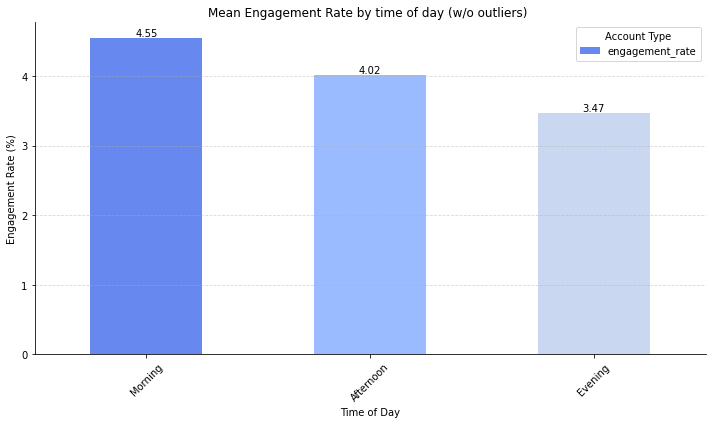

In [62]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = grouped_df1.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Time of Day')
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Mean Engagement Rate by time of day (w/o outliers) ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


### The most engagement rate is seen in the Mornings and the least is seen during the Evenings

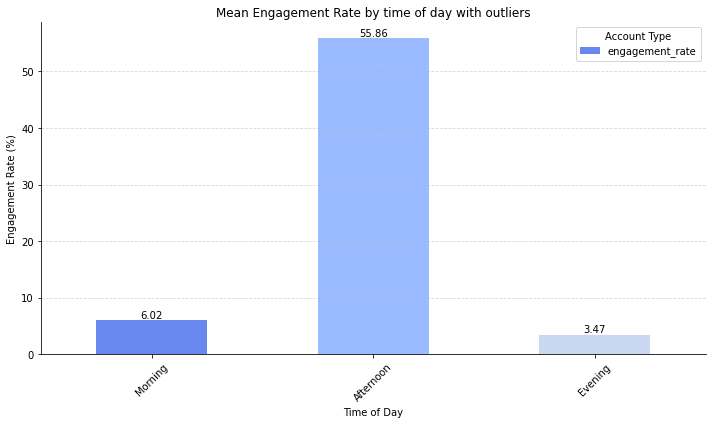

In [63]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = grouped_df2.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Time of Day')
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Mean Engagement Rate by time of day with outliers')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


### Q1 - What is the Typical Engagement Rates and likelyhood of getting >15% engagement Rate ?

In [77]:
typical_engagement_rate = ndf['engagement_rate'].mean()/100

# Computing the likelihood of achieving a 15% engagement rate
likelihood_15_percent = (ndf['engagement_rate'] >= 15).mean() *100
print("Typical Engagement Rate: {:.2%}".format(typical_engagement_rate))
print("Likelihood of Achieving 15% Engagement Rate: {:.2f}%".format(likelihood_15_percent))


Typical Engagement Rate: 4.20%
Likelihood of Achieving 15% Engagement Rate: 6.42%


### Typical Engagement Rate: 4.20%
### Likelihood of Achieving 15% Engagement Rate: 6.42%

### Q3 : - Plotting Game Title vs Engagement Rates to find the best performing game titles

In [27]:
df

,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,time,hour,classification,day_type,engagement_rate
Published Date,,,,,,,,,,,
2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text,19:55:43.192000,19,Evening,Weekday,0.000000
2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:35.243000,19,Evening,Weekday,0.000000
2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:33.535000,19,Evening,Weekday,0.000000
2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text,19:49:31.583000,19,Evening,Weekday,0.000000
2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,19:43:42.590000,19,Evening,Weekday,12.766628
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0.0,0.0,Link,10:35:12.652000,10,Morning,Weekday,0.000000
2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0.0,0.0,Link,10:34:55.487000,10,Morning,Weekday,0.000000
2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0.0,0.0,Link,10:34:38.631000,10,Morning,Weekday,0.000000


In [28]:
social = ndf.groupby(['Account'])['engagement_rate'].mean().sort_values(ascending=False)

In [49]:
social

Account
General             4.341212
DOTA2               4.298295
Content Creators    4.075632
CSGO                3.030547
Valorant            3.024861
Name: engagement_rate, dtype: float64

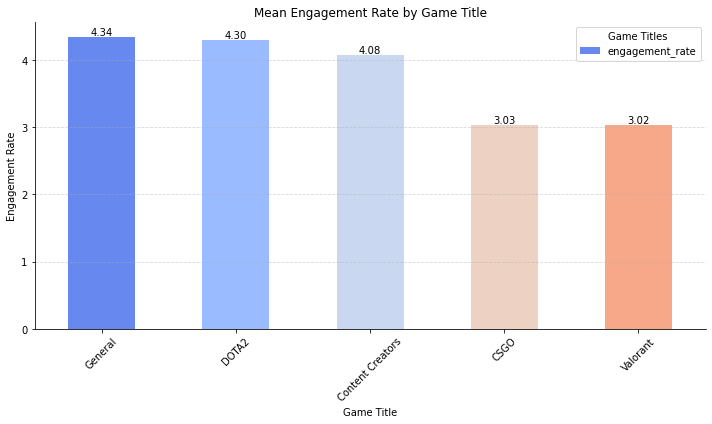

In [80]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = social.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Game Title')
ax.set_ylabel('Engagement Rate')
ax.set_title('Mean Engagement Rate by Game Title')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Game Titles')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


##### Best Performing Game Titles are DOTA 2 followed by CSGO and Valorant

### Q4 : Plotting the best performing Social Media

In [32]:
social1 = ndf.groupby(['Account Type'])['engagement_rate'].mean().sort_values(ascending=False)

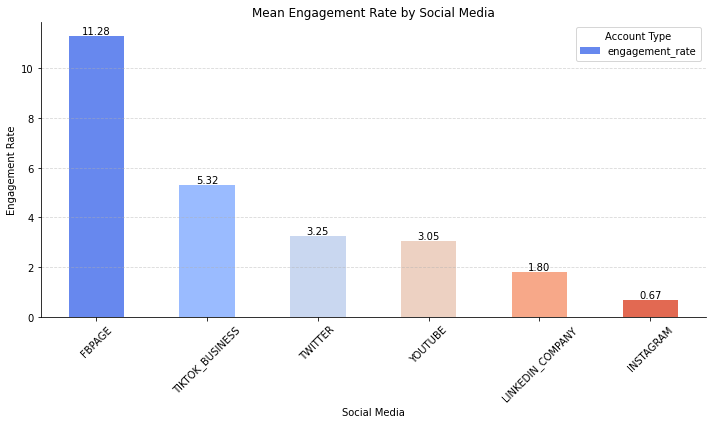

In [79]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = social1.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Social Media')
ax.set_ylabel('Engagement Rate')
ax.set_title('Mean Engagement Rate by Social Media')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


##### Best Performing Social Media Accounts of EG

### Q5 : Best Perorming Campaign

In [34]:
campaign = ndf.groupby(['Campaign Name'])['engagement_rate'].mean().sort_values(ascending = False)

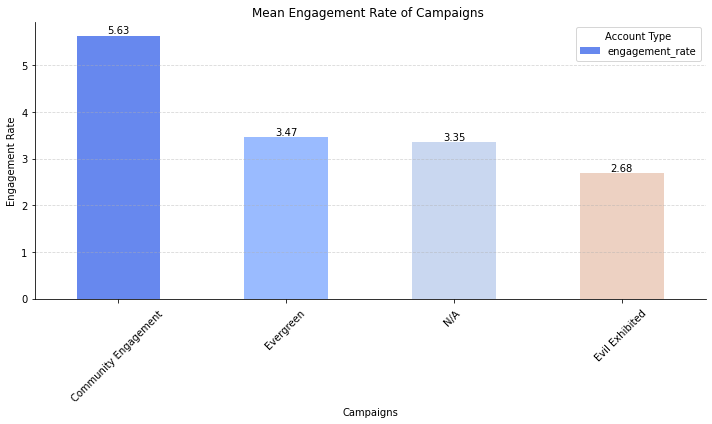

In [81]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = campaign.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Campaigns')
ax.set_ylabel('Engagement Rate')
ax.set_title('Mean Engagement Rate of Campaigns ')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


##### Best Performing Campaigns

###  Pivot Table of engagements

In [38]:
pivot_table = pd.pivot_table(ndf, values='engagement_rate', index=['Account Type','Account'], aggfunc='mean')
pivot_table = pivot_table.sort_values(by='engagement_rate', ascending = False)

In [39]:
pivot_table

engagement_rate
Account Type     Account                          
FBPAGE           General                 11.283108
TIKTOK_BUSINESS  General                  5.316753
TWITTER          DOTA2                    4.310028
YOUTUBE          Content Creators         4.075632
                 DOTA2                    3.132272
TWITTER          CSGO                     3.030547
YOUTUBE          Valorant                 3.024861
                 General                  2.507024
TWITTER          General                  2.363508
LINKEDIN_COMPANY General                  1.795018
INSTAGRAM        General                  0.666769

In [40]:
sorted_pivot_table = pivot_table.iloc[2:]

### Plotting the pivot tables

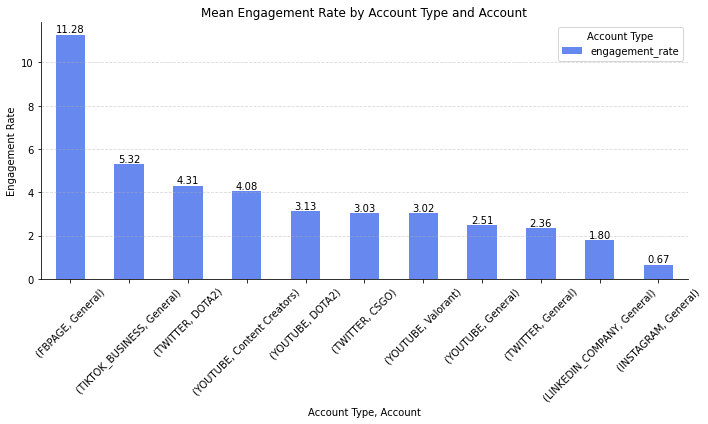

In [41]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = pivot_table.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Account Type, Account')
ax.set_ylabel('Engagement Rate')
ax.set_title('Mean Engagement Rate by Account Type and Account')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()

plt.show()


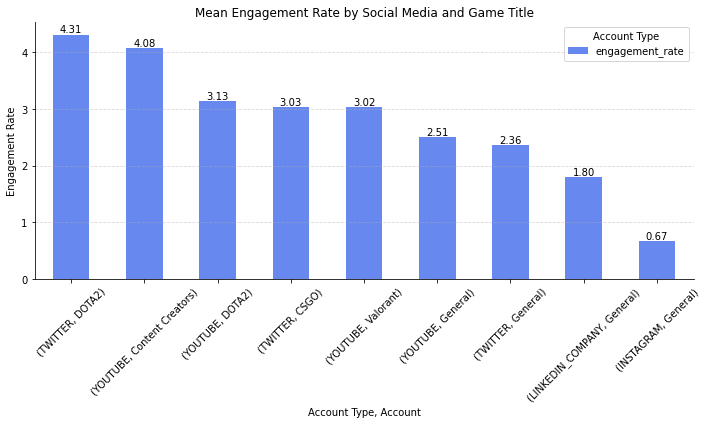

In [46]:
import seaborn as sns

# Define a color palette
colors = sns.color_palette('coolwarm')

# Create the bar plot
ax = sorted_pivot_table.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
ax.set_xlabel('Account Type, Account')
ax.set_ylabel('Engagement Rate')
ax.set_title('Mean Engagement Rate by Social Media and Game Title')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend with custom labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Account Type')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


### Heatmap of the pivot table sorted by engagement rate

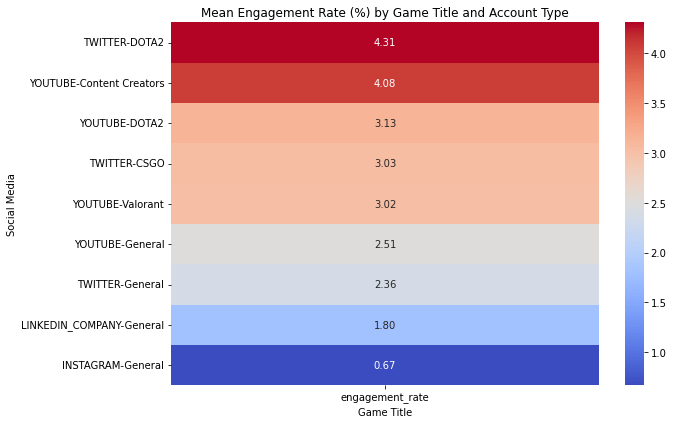

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Set labels and title
plt.xlabel('Game Title')
plt.ylabel('Social Media')
plt.title('Mean Engagement Rate (%) by Game Title and Account Type')

# Adjust plot margins
plt.tight_layout()

# Show the heatmap
plt.show()
